In [1]:
'''>>>>> start CodeP2.2
    V.P. Carey ME249, Spring 2021

Intro to Neural Network Modeling 
Keras model for comparison with first principles model'''

#import useful packages
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf

#the follwoing 2 lines are only needed for Mac OS machines
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'

#raw data in dictionary form x01, x02, x03, y3
my_dict = { 
    'x01' : [20., 20., 20., 20.2, 20., 20.2, 24.0, 36.],
    'x02' : [13., 14.5, 15.3, 13., 14.5, 15.3, 13., 14.5],
    'x03' : [310.8, 308.0, 306.0, 310.8, 308.0, 306.0, 310.8, 308.0],
    'y3' : [30.97, 32.3, 31.5, 30.91, 32.5, 31.4, 35.59, 46.4]
}
#normalized inputs in array
xdata = []
xdata = [[20./20.2, 13.0/14.5, 310.8/308.0], [20./20.2, 14.5/14.5, 308.0/308.0]] 
xdata.append([20./20.2, 15.3/14.5, 306.0/308.0])
xdata.append([20.2/20.2, 13.0/14.5, 310.8/308.0]) 
xdata.append([20./20.2, 14.5/14.5, 308.0/308.0]) 
xdata.append([20.2/20.2, 15.3/14.5, 306.0/308.0]) 
xdata.append([24./20.2, 13.0/14.5, 310.8/308.0]) 
xdata.append([36./20.2, 14.5/14.5, 308.0/308.0]) 
#data frame
df = pd.DataFrame(my_dict)
#devide by the median to normalize 
df.x01= df.x01/20.2
df.x02= df.x02/14.5
df.x03= df.x03/308.0
#normalize output array
df.y3= df.y3/32.401
df.head
print (df.x01, df.x02, df.x03, df.y3)

xarray= np.array(xdata)
print (xdata)
print (xarray)

Using TensorFlow backend.


0    0.990099
1    0.990099
2    0.990099
3    1.000000
4    0.990099
5    1.000000
6    1.188119
7    1.782178
Name: x01, dtype: float64 0    0.896552
1    1.000000
2    1.055172
3    0.896552
4    1.000000
5    1.055172
6    0.896552
7    1.000000
Name: x02, dtype: float64 0    1.009091
1    1.000000
2    0.993506
3    1.009091
4    1.000000
5    0.993506
6    1.009091
7    1.000000
Name: x03, dtype: float64 0    0.955835
1    0.996883
2    0.972192
3    0.953983
4    1.003055
5    0.969106
6    1.098423
7    1.432055
Name: y3, dtype: float64
[[0.9900990099009901, 0.896551724137931, 1.009090909090909], [0.9900990099009901, 1.0, 1.0], [0.9900990099009901, 1.0551724137931036, 0.9935064935064936], [1.0, 0.896551724137931, 1.009090909090909], [0.9900990099009901, 1.0, 1.0], [1.0, 1.0551724137931036, 0.9935064935064936], [1.188118811881188, 0.896551724137931, 1.009090909090909], [1.7821782178217822, 1.0, 1.0]]
[[0.99009901 0.89655172 1.00909091]
 [0.99009901 1.         1.        ]
 [0.990

In [2]:
# define model

#As seen below, we have created three dense layers each with just one neuron. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 3 in this case. 
#The activation function we have chosen is ReLU, which stands for rectified linear unit.

from keras import backend as K
#initialize weights with values between -0.2 and 1.2
initializer = tf.keras.initializers.RandomUniform(minval= -0.2, maxval=1.2)

# define three layer model with one neuron in each layer
model = keras.Sequential([
    keras.layers.Dense(1, activation=K.elu, input_shape=[3]),
    keras.layers.Dense(1, activation=K.elu),
    keras.layers.Dense(1, activation=K.elu)
  ])


In [3]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean absolute error. After the compilation of the model, we’ll use the fit method with 100 epochs.

#Running model.fit successive times extends the calculation to addtional epochs.

sgd = keras.optimizers.RMSprop(learning_rate=0.1)
model.compile(loss='mean_absolute_error',optimizer=sgd)


In [4]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 20, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

In [5]:
historyData = model.fit(xarray,df.y3,epochs=100,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

Epoch 1/100
8/8 [==============================] - 1s 118ms/step - loss: 1.1973
Epoch 2/100
8/8 [==============================] - 0s 566us/step - loss: 0.7643
Epoch 3/100
8/8 [==============================] - 0s 475us/step - loss: 0.4853
Epoch 4/100
8/8 [==============================] - 0s 587us/step - loss: 0.2830
Epoch 5/100
8/8 [==============================] - 0s 692us/step - loss: 0.1006
Epoch 6/100
8/8 [==============================] - 0s 1ms/step - loss: 0.1650
Epoch 7/100
8/8 [==============================] - 0s 1ms/step - loss: 0.0853
Epoch 8/100
8/8 [==============================] - 0s 744us/step - loss: 0.0849
Epoch 9/100
8/8 [==============================] - 0s 1ms/step - loss: 0.0846
Epoch 10/100
8/8 [==============================] - 0s 1ms/step - loss: 0.0842
Epoch 11/100
8/8 [==============================] - 0s 638us/step - loss: 0.0838
Epoch 12/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0833
Epoch 13/100
8/8 [=============================

In [6]:
historyData = model.fit(xarray,df.y3,epochs=100,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

Epoch 1/100
8/8 [==============================] - 0s 752us/step - loss: 0.2992
Epoch 2/100
8/8 [==============================] - 0s 746us/step - loss: 0.0805
Epoch 3/100
8/8 [==============================] - 0s 519us/step - loss: 0.1172
Epoch 4/100
8/8 [==============================] - 0s 571us/step - loss: 0.1283
Epoch 5/100
8/8 [==============================] - 0s 847us/step - loss: 0.0836
Epoch 6/100
8/8 [==============================] - 0s 1ms/step - loss: 0.0794
Epoch 7/100
8/8 [==============================] - 0s 818us/step - loss: 0.0741
Epoch 8/100
8/8 [==============================] - 0s 891us/step - loss: 0.0838
Epoch 9/100
8/8 [==============================] - 0s 996us/step - loss: 0.1414
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.1446
Epoch 11/100
8/8 [==============================] - 0s 2ms/step - loss: 0.0891
Epoch 12/100
8/8 [==============================] - 0s 1ms/step - loss: 0.0834
Epoch 13/100
8/8 [===========================

In [7]:
sgd = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(loss='mean_absolute_error',optimizer=sgd)

historyData = model.fit(xarray,df.y3,epochs=200,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

Epoch 1/200
8/8 [==============================] - 1s 107ms/step - loss: 0.3506
Epoch 2/200
8/8 [==============================] - 0s 569us/step - loss: 0.2883
Epoch 3/200
8/8 [==============================] - 0s 481us/step - loss: 0.2450
Epoch 4/200
8/8 [==============================] - 0s 838us/step - loss: 0.2103
Epoch 5/200
8/8 [==============================] - 0s 816us/step - loss: 0.1805
Epoch 6/200
8/8 [==============================] - 0s 2ms/step - loss: 0.1540
Epoch 7/200
8/8 [==============================] - 0s 827us/step - loss: 0.1299
Epoch 8/200
8/8 [==============================] - 0s 920us/step - loss: 0.1076
Epoch 9/200
8/8 [==============================] - 0s 3ms/step - loss: 0.0866
Epoch 10/200
8/8 [==============================] - 0s 846us/step - loss: 0.0717
Epoch 11/200
8/8 [==============================] - 0s 845us/step - loss: 0.0664
Epoch 12/200
8/8 [==============================] - 0s 2ms/step - loss: 0.0647
Epoch 13/200
8/8 [=========================

In [8]:
sgd = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='mean_absolute_error',optimizer=sgd)

historyData = model.fit(xarray,df.y3,epochs=200,callbacks=[es,mc])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

Epoch 1/200
8/8 [==============================] - 1s 111ms/step - loss: 0.0189

Epoch 00001: loss improved from inf to 0.01893, saving model to best_model.SB
Epoch 2/200
8/8 [==============================] - 0s 311us/step - loss: 0.0178

Epoch 00002: loss improved from 0.01893 to 0.01779, saving model to best_model.SB
Epoch 3/200
8/8 [==============================] - 0s 602us/step - loss: 0.0183

Epoch 00003: loss did not improve from 0.01779
Epoch 4/200
8/8 [==============================] - 0s 353us/step - loss: 0.0169

Epoch 00004: loss improved from 0.01779 to 0.01694, saving model to best_model.SB
Epoch 5/200
8/8 [==============================] - 0s 791us/step - loss: 0.0169

Epoch 00005: loss improved from 0.01694 to 0.01692, saving model to best_model.SB
Epoch 6/200
8/8 [==============================] - 0s 358us/step - loss: 0.0180

Epoch 00006: loss did not improve from 0.01692
Epoch 7/200
8/8 [==============================] - 0s 386us/step - loss: 0.0173

Epoch 00007: lo

/Applications/Software/Anaconda/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '



Epoch 00010: loss improved from 0.01692 to 0.01685, saving model to best_model.SB
Epoch 11/200
8/8 [==============================] - 0s 1ms/step - loss: 0.0167

Epoch 00011: loss improved from 0.01685 to 0.01673, saving model to best_model.SB
Epoch 12/200
8/8 [==============================] - 0s 708us/step - loss: 0.0169

Epoch 00012: loss did not improve from 0.01673
Epoch 13/200
8/8 [==============================] - 0s 1ms/step - loss: 0.0182

Epoch 00013: loss did not improve from 0.01673
Epoch 14/200
8/8 [==============================] - 0s 1ms/step - loss: 0.0173

Epoch 00014: loss did not improve from 0.01673
Epoch 15/200
8/8 [==============================] - 0s 1ms/step - loss: 0.0170

Epoch 00015: loss did not improve from 0.01673
Epoch 16/200
8/8 [==============================] - 0s 1ms/step - loss: 0.0170

Epoch 00016: loss did not improve from 0.01673
Epoch 17/200
8/8 [==============================] - 0s 1ms/step - loss: 0.0173

Epoch 00017: loss did not improve from

In [9]:
from __future__ import print_function
#For results of training network:

#keras.layer.get_weights() function retrieves weight values
first_layer_weights = model.layers[0].get_weights()[0]
w01 = first_layer_weights[0][0]
w02 = first_layer_weights[1][0]
w03 = first_layer_weights[2][0]
first_layer_bias  = model.layers[0].get_weights()[1]
b1 = first_layer_bias
second_layer_weights = model.layers[1].get_weights()[0]
w12 = second_layer_weights[0][0]
second_layer_bias  = model.layers[1].get_weights()[1]
b2 = second_layer_bias
third_layer_weights = model.layers[2].get_weights()[0]
w23 = third_layer_weights[0][0]
third_layer_bias  = model.layers[2].get_weights()[1]
b3 = third_layer_bias

#print weights and biases
print (first_layer_weights)
print ('w01 = ', w01, 'w02 = ', w02, 'w03 = ', w03)
print (first_layer_bias)
print ('b1 = ', b1)
print (second_layer_weights)
print ('w12 = ', w12)
print (second_layer_bias)
print ('b2 = ', b2)
print (third_layer_weights)
print ('w23 = ', w23)
print (third_layer_bias)
print ('b3 = ', b3)

#use model.predict() function to print model predictions for data conditions
xarray= np.array(xdata)
print ('x01/20.2,  x02/14.5,   x03/308.0,  y3/32.4,  a3:')
test = []
for i in range(0,8): 
    test = [[xarray[i][0], xarray[i][1], xarray[i][2]]]
    testarray = np.array(test)
    a3 = model.predict(testarray)
    print (xarray[i][0], xarray[i][1], xarray[i][2], df.y3[i], a3)
print('  ')
print ('x01,  x02,   x03,  y3,  a3*32.4:')
for i in range(0,8): 
    test = [[xarray[i][0], xarray[i][1], xarray[i][2]]]
    testarray = np.array(test)
    a3 = model.predict(testarray)
    print (xarray[i][0]*20.2, xarray[i][1]*14.5, xarray[i][2]*308.0, df.y3[i]*32.4, a3*32.4)

[[ 1.564119  ]
 [-0.45188004]
 [-0.5696211 ]]
w01 =  1.564119 w02 =  -0.45188004 w03 =  -0.5696211
[-0.52396977]
b1 =  [-0.52396977]
[[0.9981894]]
w12 =  0.9981894
[-0.11985482]
b2 =  [-0.11985482]
[[0.3756329]]
w23 =  0.3756329
[1.0126067]
b3 =  [1.0126067]
x01/20.2,  x02/14.5,   x03/308.0,  y3/32.4,  a3:
0.9900990099009901 0.896551724137931 1.009090909090909 0.9558346964599856 [[0.9853929]]
0.9900990099009901 1.0 1.0 0.9968828122588808 [[0.971232]]
0.9900990099009901 1.0551724137931036 0.9935064935064936 0.9721922162896206 [[0.96427524]]
1.0 0.896551724137931 1.009090909090909 0.9539829017622912 [[0.99082077]]
0.9900990099009901 1.0 1.0 1.003055461251196 [[0.971232]]
1.0 1.0551724137931036 0.9935064935064936 0.9691058917934631 [[0.96932137]]
1.188118811881188 0.896551724137931 1.009090909090909 1.0984228881824636 [[1.1004896]]
1.7821782178217822 1.0 1.0 1.4320545662170918 [[1.4333022]]
  
x01,  x02,   x03,  y3,  a3*32.4:
20.0 13.0 310.8 30.969044165303533 [[31.926733]]
20.0 14.5 308.

In [30]:
predictedvals = np.array([32.4*model.predict(np.array([xarray[i]]))[0][0] for i in range(8)])
actualvals = np.array(32.4*df.y3)

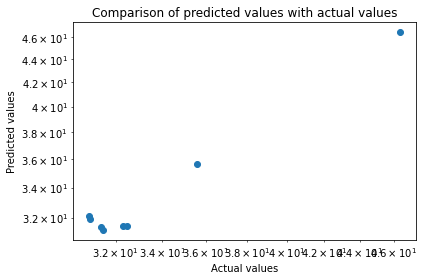

In [35]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.scatter(actualvals,predictedvals)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Actual values")
ax.set_ylabel("Predicted values")
ax.set_title("Comparison of predicted values with actual values")
ax.grid()
fig.tight_layout()

In [33]:
predictedvals

array([31.92673087, 31.4679167 , 31.24251781, 32.1025928 , 31.4679167 ,
       31.40601239, 35.65586357, 46.43899012])

In [34]:
actualvals

array([30.96904417, 32.29900312, 31.49902781, 30.90904602, 32.49899694,
       31.39903089, 35.58890158, 46.39856795])